In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fake-news-classification


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
fake_news=pd.read_csv('Fake.csv')
true_news=pd.read_csv('True.csv')

In [ ]:
fake_news.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news['label']='fake'
true_news['label']='true'

In [ ]:
combined_news=pd.concat([fake_news, true_news])

In [ ]:
combined_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
combined_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
combined_news = combined_news.sample(n=len(combined_news), random_state=None).reset_index(drop=True)
combined_news

,title,text,subject,date,label
0,BREAKING: This New Analysis BAD News For Obam...,Paul Ryan is all over Twitter chanting repeal...,News,"April 9, 2017",fake
1,Spy agencies concerned about possible U.S. ele...,WASHINGTON (Reuters) - American intelligence a...,politicsNews,"September 13, 2016",true
2,Factbox: Proposals of main parties in Honduras...,TEGUCIGALPA (Reuters) - Hondurans vote on Sund...,worldnews,"November 26, 2017",true
3,House could pass tax reform if Senate adds hea...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"November 15, 2017",true
4,Yahoo scanning order unlikely to be made publi...,WASHINGTON (Reuters) - Obama administration of...,politicsNews,"October 25, 2016",true
...,...,...,...,...,...
44893,The Daily Show Slams Trump And Cruz In Hilari...,Trevor Noah and The Daily Show had a field day...,News,"January 8, 2016",fake
44894,Exclusive: Super PACs backing Republican Cruz ...,WASHINGTON (Reuters) - Making a final push tow...,politicsNews,"February 26, 2016",true
44895,China urges North Korea not to go further in a...,UNITED NATIONS (Reuters) - China’s foreign min...,politicsNews,"September 21, 2017",true
44896,Republicans lack agreement on Obamacare ahead ...,WASHINGTON (Reuters) - The White House and Con...,politicsNews,"February 28, 2017",true


In [ ]:
combined_news.label.value_counts()

,count
label,
fake,23481
true,21417


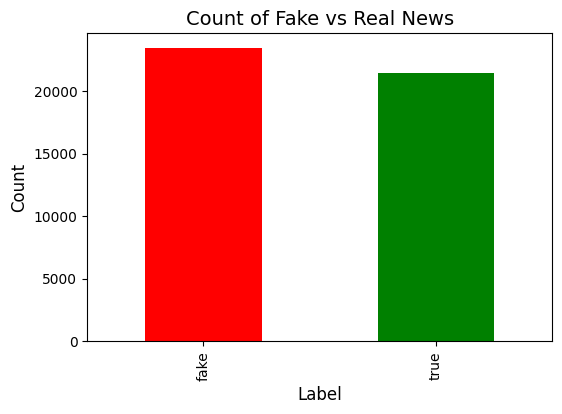

In [ ]:
label_counts = combined_news.label.value_counts()
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Count of Fake vs Real News', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
X=combined_news.iloc[:, :-2]
y=combined_news['label']

In [ ]:
X.head()

,title,text,subject
0,BREAKING: This New Analysis BAD News For Obam...,Paul Ryan is all over Twitter chanting repeal...,News
1,Spy agencies concerned about possible U.S. ele...,WASHINGTON (Reuters) - American intelligence a...,politicsNews
2,Factbox: Proposals of main parties in Honduras...,TEGUCIGALPA (Reuters) - Hondurans vote on Sund...,worldnews
3,House could pass tax reform if Senate adds hea...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews
4,Yahoo scanning order unlikely to be made publi...,WASHINGTON (Reuters) - Obama administration of...,politicsNews


In [ ]:
y.head()

,label
0,fake
1,true
2,true
3,true
4,true


In [ ]:
text_columns = ['title', 'text', 'subject']
for col in text_columns:
    X[col] = X[col].str.lower()

<ipython-input-28-5f9c89bdd6f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.lower()


In [ ]:
X.head()

,title,text,subject
0,breaking: this new analysis bad news for obam...,paul ryan is all over twitter chanting repeal...,news
1,spy agencies concerned about possible u.s. ele...,washington (reuters) - american intelligence a...,politicsnews
2,factbox: proposals of main parties in honduras...,tegucigalpa (reuters) - hondurans vote on sund...,worldnews
3,house could pass tax reform if senate adds hea...,washington (reuters) - the republican-controll...,politicsnews
4,yahoo scanning order unlikely to be made publi...,washington (reuters) - obama administration of...,politicsnews


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [ ]:
X=vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(combined_news['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = nb_classifier.predict(X_test.toarray())


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9771714922048997

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      4732
           1       0.95      1.00      0.98      4248

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [ ]:
mnb_classfier=MultinomialNB()
mnb_classfier.fit(X_train.toarray(), y_train)

MultinomialNB()

In [ ]:
y_pred2 = mnb_classfier.predict(X_test.toarray())

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.9407572383073497

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      4732
           1       0.94      0.93      0.94      4248

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [ ]:
dt_classifier=DecisionTreeClassifier()